In [1]:
import csv
from itertools import groupby
import matplotlib.pyplot as plt
import numpy as np

In [2]:
count = 0
data = []
cols = {}
with open("Privacy - Sheet1.csv") as queries:
    csv_reader = csv.reader(queries)
    next(csv_reader)
    count = 0
    for row in csv_reader:
        for i in range(19):
            if i in cols.keys():
                cols[i].append(row[i])
            else:
                cols[i] = [row[i]]
        data.append(row)
        count+=1
# print(cols)

In [11]:
favor = cols[9]
trust = cols[10]

# print(favor)
# print(trust)

lst1 = []
lst2 = []
lst3 = []

for i in range(0,52):
    if favor[i] == 'Yes':
        lst1.append(trust[i])
    elif favor[i] == 'No':
        lst2.append(trust[i])
    elif favor[i] == 'Maybe':
        lst3.append(trust[i])
        
dict1 = {value: len(list(freq)) for value, freq in groupby(sorted(lst1))}
dict2 = {value: len(list(freq)) for value, freq in groupby(sorted(lst2))}
dict3 = {value: len(list(freq)) for value, freq in groupby(sorted(lst3))}

group1 = [0,0,0]
group2 = [0,0,0]

itemsTemp = dict1.items() 
for item in itemsTemp: 
    if item[0]=='I am fine with providing my facial data to improve such applications for faster payments':
        group1[1] = item[1]
    elif item[0]=='I prefer paying via facial recognition in public places':
        group2[1] = item[1]

itemsTemp = dict2.items() 
for item in itemsTemp: 
    if item[0]=='I am fine with providing my facial data to improve such applications for faster payments':
        group1[0] = item[1]
    elif item[0]=='I prefer paying via facial recognition in public places':
        group2[0] = item[1]
        
itemsTemp = dict3.items() 
for item in itemsTemp: 
    if item[0]=='I am fine with providing my facial data to improve such applications for faster payments':
        group1[2] = item[1]
    elif item[0]=='I prefer paying via facial recognition in public places':
        group2[2] = item[1]


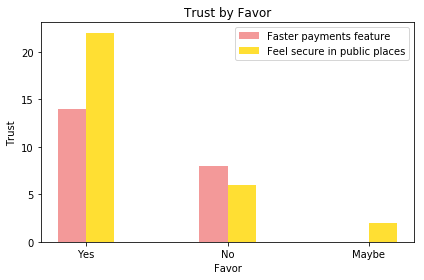

In [19]:
# data to plot
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index+bar_width/2, group1, bar_width,
alpha=opacity,
color='lightcoral',
label='Faster payments feature')

rects2 = plt.bar(index+3*bar_width/2, group2, bar_width,
alpha=opacity,
color='gold',
label='Feel secure in public places')

plt.xlabel('Favor')
plt.ylabel('Trust')
plt.title('Trust by Favor')
plt.xticks(index + bar_width, ('Yes', 'No', 'Maybe'))
plt.legend()

plt.tight_layout()
plt.show()